In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
raw = pd.read_csv ("../datasets/2018merging1h.csv", header=0)
raw.head()

,timestamp,temp_celsius,pression,windspeed_mps,voltage_mean,p3_mean,cosphi_mean,load_factor,is_summer,is_fall,is_winter,is_spring,isBday
0,2018-01-01 00:00:00,23,1010.5,1.5,13.819525,68.987584,0.943439,0.945299,1,0,0,0,0
1,2018-01-01 01:00:00,23,1010.2,1.4,13.723727,68.466381,0.950982,0.945654,1,0,0,0,0
2,2018-01-01 02:00:00,23,1009.9,1.0,13.764526,68.889280,0.951596,0.917237,1,0,0,0,0
3,2018-01-01 03:00:00,23,1009.4,0.5,13.810144,69.693009,0.948811,0.947339,1,0,0,0,0
4,2018-01-01 04:00:00,23,1008.8,0.4,13.851163,69.340223,0.939526,0.932445,1,0,0,0,0


In [9]:
raw['timestamp'] = pd.to_datetime (raw['timestamp'], utc=True)
raw = raw.set_index(raw.timestamp)
raw = raw.drop ('timestamp', axis=1)

raw = raw.set_index(raw.index.tz_convert(None))

# Random forest algorithm

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math

# split 70% of training 30% of test
X_train, X_test, y_train, y_test = train_test_split(raw.drop('p3_mean', axis=1), raw['p3_mean'], test_size=0.3)

/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/benitez/anaconda3/lib/python3.7/si

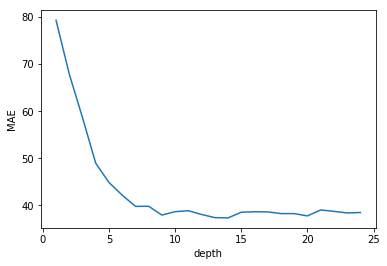

In [45]:
mae = {}
for k in range(1,25, 1):
    model = RandomForestRegressor(max_depth=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mae[k] = metrics.mean_absolute_error(y_test,y_hat)
plt.figure()
plt.plot(list(mae.keys()), list(mae.values()))
plt.xlabel("depth")
plt.ylabel("MAE")
plt.show()

In [46]:
# Random Forest
model = RandomForestRegressor(max_depth=5)
model.fit(X_train,y_train)

/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
# TEST
y_hat = model.predict(X_test)

print ("MAE:                ", metrics.mean_absolute_error(y_test,y_hat))
print ("RMSE:               ", math.sqrt(metrics.mean_squared_error(y_test,y_hat)))

# Feature analysis
print ("=====================================")
print ("FEATURE IMPORTANCE:")
for i in range(model.feature_importances_.size):
    print (X_train.columns[i], "=", model.feature_importances_[i])

MAE:                 44.983436759044686
RMSE:                71.97546346560975
FEATURE IMPORTANCE:
temp_celsius = 0.3885390824218182
pression = 0.004013581171605364
windspeed_mps = 0.003890906649043779
voltage_mean = 0.005794874769714191
cosphi_mean = 0.2663973173413444
load_factor = 0.010368017516003303
is_summer = 0.018852848561469786
is_fall = 0.0014667480771477282
is_winter = 0.0
is_spring = 1.780072339419758e-06
isBday = 0.3006748434195138


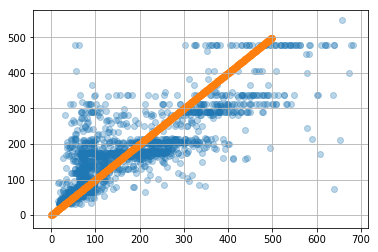

In [50]:
# Previsto vs real
line = np.arange(0, 500, 1)

plt.scatter(y_test,y_hat, Alpha=0.3)
plt.scatter(line,line)
plt.grid(True)

# Interpretation